# Setting the Influent in Sumo - Introductory Practice and Example

Import relevant libraries

In [8]:
from dynamita.sumo import *

import numpy
import time
import copy as cp
import matplotlib.pyplot as plt
%matplotlib notebook

In [9]:
sumo = Sumo(sumoPath="C:/Users/Sara/AppData/Local/Dynamita/Sumo19",
           licenseFile=r"C:/Users/Sara/Desktop/sewerWRRF/networklicense.sumolic")

License OK...


In [10]:
unchanged = 0
changed = 1

### Run with unchanged model variables

In [11]:
if unchanged == 1:
    
    def datacomm_callback(sumo):
        t_noset.append(sumo.core.csumo_var_get_time_double(sumo.handle))
        snhx_effl_noset.append(sumo.core.csumo_var_get_pvt_pos(sumo.handle, snhx_effl_pos))
        xtss_effl_noset.append(sumo.core.csumo_var_get_pvt_pos(sumo.handle, xtss_effl_pos))
        snhx_infl_noset.append(sumo.core.csumo_var_get_pvt_pos(sumo.handle, snhx_infl_pos))
        return 0
    
    sumo.unload_model()
    sumo.load_model('A2O plant.sumo')
    
    sumo.core.csumo_command_send(sumo.handle, b'execute script_Initialize.scs;')
    
    sumo.register_datacomm_callback(datacomm_callback)
    
    snhx_effl_pos = sumo.core.csumo_model_get_variable_info_pos(sumo.handle, b'Sumo__Plant__Effluent__SNHx')
    xtss_effl_pos = sumo.core.csumo_model_get_variable_info_pos(sumo.handle, b'Sumo__Plant__Effluent__XTSS')
    snhx_infl_pos = sumo.core.csumo_model_get_variable_info_pos(sumo.handle, b'Sumo__Plant__Influent__SNHx')
    
    sumo.set_stopTime(10*24*60*60*1000)
    sumo.set_dataComm(50*60*1000)
    
    t_noset = []
    snhx_effl_noset = []
    xtss_effl_noset = []
    snhx_infl_noset = []
    
    sumo.run_model()
    while not sumo.simulation_finished:
        time.sleep(0.01)
        
    snhx_effl_noset_cp = cp.deepcopy(snhx_effl_noset)
    xtss_effl_noset_cp = cp.deepcopy(xtss_effl_noset)
    snhx_infl_noset_cp = cp.deepcopy(snhx_infl_noset)
    t_noset_cp = cp.deepcopy(t_noset)
    
    time.sleep(5)

### Run with set to change model variables

In [14]:
if changed == 1:
    def datacomm_callback(sumo):
        t_set.append(sumo.core.csumo_var_get_time_double(sumo.handle))
        snhx_effl_set.append(sumo.core.csumo_var_get_pvt_pos(sumo.handle, snhx_effl_pos))
        xtss_effl_set.append(sumo.core.csumo_var_get_pvt_pos(sumo.handle, xtss_effl_pos))
        snhx_infl_set.append(sumo.core.csumo_var_get_pvt_pos(sumo.handle, snhx_infl_pos))
        return 0
    
    sumo.unload_model()
    sumo.load_model('A2O plant.sumo')
    
    sumo.core.csumo_command_send(sumo.handle, b'execute script_Initialize.scs;')
    
    sumo.register_datacomm_callback(datacomm_callback)
    
    snhx_effl_pos = sumo.core.csumo_model_get_variable_info_pos(sumo.handle, b'Sumo__Plant__Effluent__SNHx')
    xtss_effl_pos = sumo.core.csumo_model_get_variable_info_pos(sumo.handle, b'Sumo__Plant__Effluent__XTSS')
    snhx_infl_pos = sumo.core.csumo_model_get_variable_info_pos(sumo.handle, b'Sumo__Plant__Influent__SNHx')
    
    # Set variables in model
    sumo.core.csumo_command_send(sumo.handle, b'set Sumo__Plant__Influent__SNHx 100;')
    sumo.core.csumo_command_send(sumo.handle, b'set Sumo__Plant__Effluent__SNHx 100;')
    sumo.core.csumo_command_send(sumo.handle, b'set Sumo__Plant__CSTR__v47_SNHx 5;')
    
    sumo.set_stopTime(10*24*60*60*1000)
    sumo.set_dataComm(50*60*1000)
    
    t_set = []
    snhx_effl_set = []
    xtss_effl_set = []
    snhx_infl_set = []
    
    sumo.run_model()
    while not sumo.simulation_finished:
        time.sleep(0.01)
    
    snhx_effl_set_cp = cp.deepcopy(snhx_effl_set)
    xtss_effl_set_cp = cp.deepcopy(xtss_effl_set)
    snhx_infl_set_cp = cp.deepcopy(snhx_infl_set)
    t_set_cp = cp.deepcopy(t_set)

### Plot results

<IPython.core.display.Javascript object>


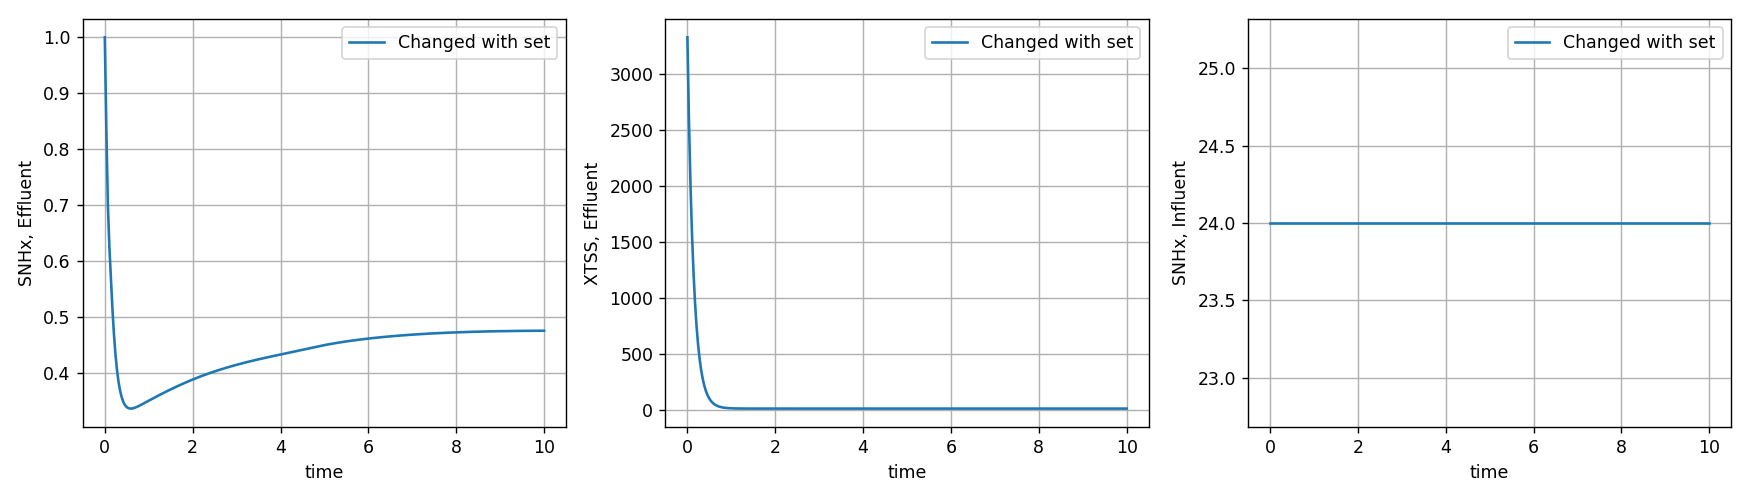

In [15]:
fig, (axs) = plt.subplots(1,3, figsize=(14,4))

if unchanged == 1:
    axs[0].plot(t_noset_cp, snhx_effl_noset_cp, label='Unchanged')
    axs[1].plot(t_noset_cp, xtss_effl_noset_cp, label='Unchanged')
    axs[2].plot(t_noset_cp, snhx_infl_noset_cp, label='Unchanged')

if changed == 1:
    axs[0].plot(t_set_cp, snhx_effl_set_cp, label='Changed with set')
    axs[1].plot(t_set_cp, xtss_effl_set_cp, label='Changed with set')
    axs[2].plot(t_set_cp, snhx_infl_set_cp, label='Changed with set')

axs[0].set_xlabel('time'); axs[0].set_ylabel('SNHx, Effluent')
axs[1].set_xlabel('time'); axs[1].set_ylabel('XTSS, Effluent')
axs[2].set_xlabel('time'); axs[2].set_ylabel('SNHx, Influent')

axs[0].legend()
axs[1].legend()
axs[2].legend()

plt.rcParams['axes.grid'] = True
plt.tight_layout()
plt.show()